<a href="https://colab.research.google.com/github/FelipeToroR/MLP_Desafio3/blob/main/MLP_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical

In [ ]:
# Leer y guardar el dataset
!git clone https://github.com/OptativoPUCV/Handwritten-letter-dataset
!mkdir Datos-letras
!7z x "/content/Handwritten-letter-dataset/A_Z Handwritten Data.7z.001" -tsplit
!7z e "/content/A_Z Handwritten Data.7z"
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

## **Se separan los datos en inputs(x) y labels(y) y luego se normalizan**

In [ ]:
x1 = data.drop('0',axis = 1)  # x serán los datos de ENTRADA
y1 = data['0']    # y representa el label o letra de SALIDA
y1= y1[:,np.newaxis]

X, x_test, Y, y_test = train_test_split(x1, y1, test_size = 0.3) #<--- 70% datos para entrenar y 30% para testear

shuffle_data = shuffle(X)

# Normalizando datos
X = X.astype('float32') # <--- Entrada
X /= 255

x_testing = x_test.astype('float32')
x_testing /= 255


num_classes = 26  # <--- Salida
Y = to_categorical(Y, num_classes)
y_testing = to_categorical(y_test, num_classes)


## **La función activación retorna el valor activado y valor derivado** 

In [4]:
def activation(x):
  return ((1/(1+np.e**(-x))) , (x * (1-x)))

## **Se crea la capa con su respectiva función de activación y sus pesos conectados con la capa anterior.**

In [5]:
class Capa():
  def __init__(self, n_conexiones: int, n_neuronas: int, activation):
    self.activation = activation
    self.W = np.random.rand(n_conexiones, n_neuronas) * 2 - 1

# **Creación de la red**
Se recibe la topología, es decir, un arreglo de capas la cual consiste en **[x, capas ocultas, y]** : <br> 

* x = neuronas de inputs
* capas ocultas = desde 1 a ∞+
* y = neuronas de outputs



In [6]:
def crear_red(topologia: list, activation):
  red = []
  for l, capa in enumerate(topologia[:-1]):
    red.append( Capa(topologia[l], topologia[l+1], activation) )
  return red

# **Forward Propagation**

In [7]:
def forward(red, X):
  out = [(None, X)]
  for l, capa in enumerate(red):
    z = out[-1][1] @ red[l].W # Multiplicación de matrices
    a = red[l].activation(z)[0] # La función de activación retorna el valor activado y el derivado, necesitamos el activado para el forward
    out.append((z, a)) # Guardamos todas las combinaciones para poder usar la misma función en el backpropagation
  return out

# **Calcular la predicción**

In [8]:
p = 784
topologia = [p, 208, 104, 52, 26]
red = crear_red(topologia, activation)
prediccion = forward(red, X)

prediccion_testing = forward(red, x_testing)
# La predicción de todos los valores de entrada de X
print(prediccion[-1][1])

              0         1         2         3         4         5         6   \
228208  0.433816  0.949290  0.896352  0.993223  0.847889  0.895841  0.659194   
336723  0.528701  0.953141  0.770984  0.984939  0.961489  0.644451  0.884861   
331440  0.705573  0.941388  0.890691  0.980590  0.974482  0.721810  0.584318   
63542   0.770493  0.838680  0.813373  0.995053  0.975149  0.879717  0.916663   
298725  0.715881  0.961002  0.940235  0.994468  0.949657  0.624116  0.956546   
...          ...       ...       ...       ...       ...       ...       ...   
101107  0.624770  0.981572  0.877137  0.992198  0.991714  0.579753  0.868132   
68160   0.674864  0.939897  0.840781  0.998327  0.903499  0.904844  0.961685   
228131  0.689942  0.894962  0.883064  0.990602  0.871355  0.895352  0.611229   
18840   0.562251  0.966232  0.907499  0.983055  0.919037  0.879709  0.890360   
130339  0.653956  0.958946  0.958845  0.985184  0.980024  0.879519  0.905794   

              7         8         9   .

# **Función de coste**

In [10]:
def coste(Ypred, Yesp):
  return (np.mean((Ypred - Yesp) ** 2), (Ypred - Yesp))

# **Modelo matemático**
En forma de algoritmo se utilizan las funciones de propagación 'forward' y 'backward' con el fin de propagar los resultados desde el input hasta el output y así sucesivamente. La clave estará en el descenso del gradiente, la cual nos dará los valores mínimos (coste de entrenamiento).

In [11]:
def train(red, X, Y, coste, learning_rate=0.001):
  # forward 
  out = forward(red, X)

  # backward pass
  delta = []
  #for i in range(len(red)-1, -1, -1): # recorrer hacie atrás del largo a 0
  for i in reversed(range(0,len(red))):
    z = out[i+1][0]
    a = out[i+1][1]
    if i == len(red)-1:
        #delta última capa
        delta.insert(0, coste(a, Y)[1] * red[i].activation(a)[1] ) # delta 0 = derivada del coste (osea Ypred - Yesp) * derivada de activación de la capa
    else:
        # delta respecto al anterior
        delta.insert(0, delta[0] @ aux_W.T * red[i].activation(a)[1]) # delta n = delta(n+1) x W(n+1).T * derivada de activación de la capa 
    aux_W = red[i].W
    # Descenso del gradiente
    red[i].W = red[i].W - out[i][1].T @ delta[0] * learning_rate # nuevoW[i] = actualW[i] - salida[i].T x delta * learning_rate

  return out[-1][1]

# **Entrenamiento**
Tomando el modelo anterior, se iterará 100 veces con un learning rate del 0.001


Coste iteración 0: 0     0.260163
1     0.663052
2     0.062865
3     0.045796
4     0.038150
5     0.738833
6     0.410979
7     0.023074
8     0.003112
9     0.422782
10    0.147108
11    0.412181
12    0.811884
13    0.134475
14    0.261397
15    0.686930
16    0.485341
17    0.051156
18    0.426982
19    0.567838
20    0.073564
21    0.590744
22    0.096833
23    0.737815
24    0.186789
25    0.039381
dtype: float64
Coste iteración 25: 0     0.036910
1     0.023167
2     0.063019
3     0.027118
4     0.030834
5     0.002942
6     0.015419
7     0.019738
8     0.003002
9     0.022833
10    0.014997
11    0.031245
12    0.033067
13    0.050879
14    0.155472
15    0.051616
16    0.015596
17    0.031145
18    0.129900
19    0.060353
20    0.078304
21    0.011353
22    0.028959
23    0.016535
24    0.029189
25    0.016397
dtype: float64
Coste iteración 50: 0     0.036910
1     0.023167
2     0.063019
3     0.027118
4     0.030834
5     0.002942
6     0.015419
7     0.019738
8     0.003

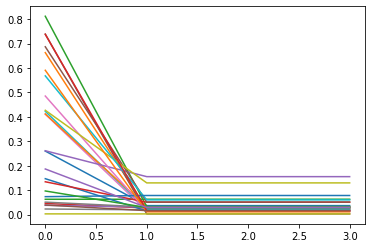

In [12]:
import time 
from IPython.display import clear_output
topologia = [784, 208, 104, 52, 26]
red = crear_red(topologia, activation)
loss = []

for i in range(100):
  pY = train(red, X, Y, coste, learning_rate=0.001)
  if i % 25 == 0:
    costo = coste(pY, Y)[0]
    print(f'Coste iteración {i}: {costo}')
    loss.append(costo)
    

    
plt.plot(range(len(loss)), loss)
plt.show()

# **Coste de entrenamiento**
Como se puede observar en el gráfico el coste se reduce. Cabe destacar que cada letra (A-Z) se representa con un color.

In [13]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Y_pred = prediccion_testing[-1][1]
Y_pred = Y_pred.to_numpy()
Y_exp = y_testing
for i in range(len(Y_pred)):
  Y_pred[i] = np.array([1 if Y_pred[i][j] == np.max(Y_pred[i]) else 0 for j in range(len(Y_pred[i]))])
  

print(accuracy_score(Y_exp, Y_pred))
print(classification_report(Y_exp, Y_pred))

matriz_confusion = multilabel_confusion_matrix(Y_exp, Y_pred)

0.02625855819573097


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4246
           1       0.01      0.01      0.01      2628
           2       0.34      0.00      0.01      6979
           3       0.03      0.40      0.06      3064
           4       0.02      0.05      0.03      3401
           5       0.00      0.00      0.00       396
           6       0.00      0.00      0.00      1742
           7       0.00      0.00      0.00      2072
           8       0.00      0.00      0.00       335
           9       0.03      0.55      0.05      2540
          10       0.00      0.00      0.00      1693
          11       0.00      0.00      0.00      3440
          12       0.00      0.00      0.00      3715
          13       0.00      0.00      0.00      5745
          14       0.00      0.00      0.00     17291
          15       0.00      0.00      0.00      5884
          16       0.00      0.00      0.00      1746
          17       0.00    

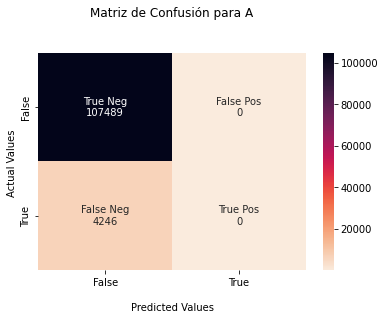

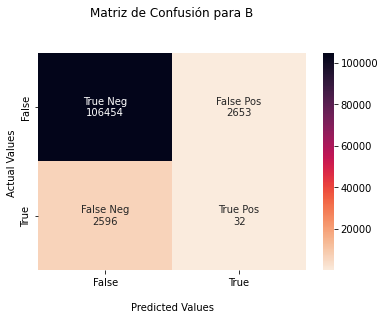

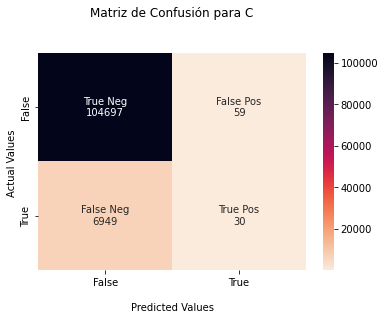

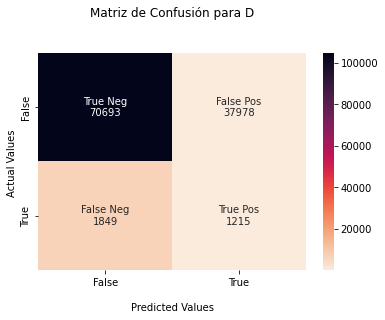

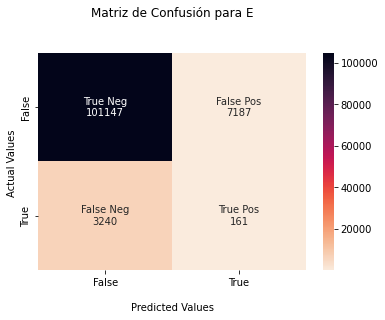

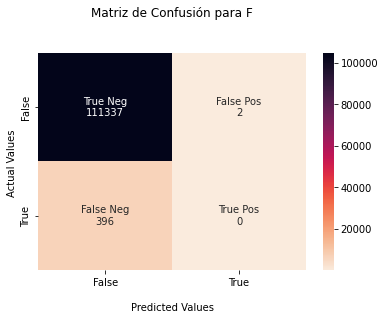

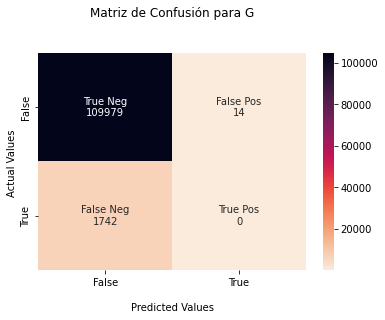

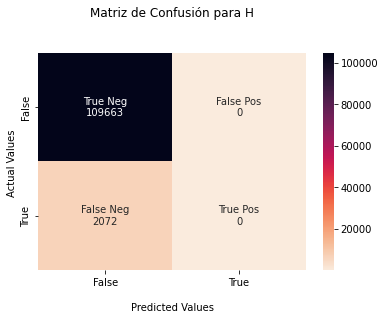

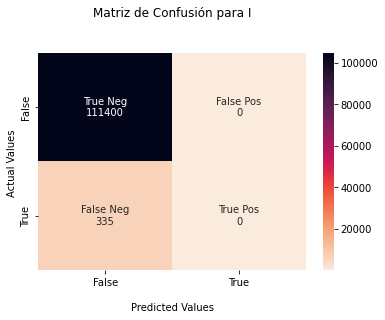

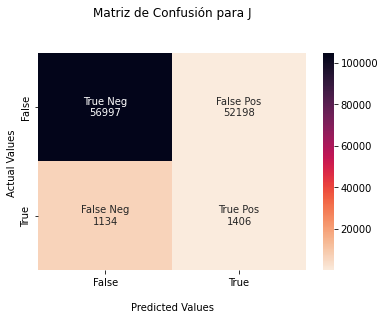

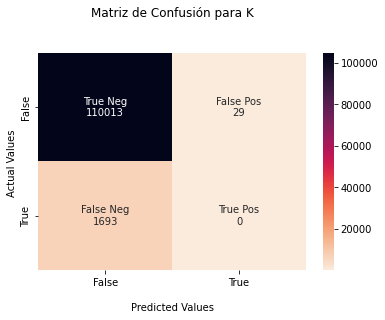

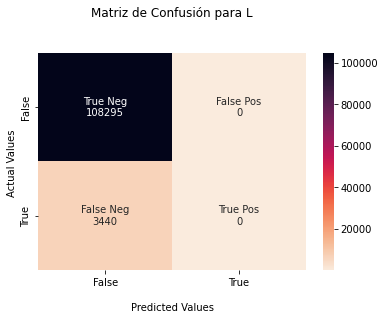

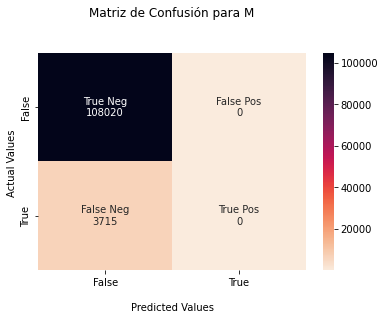

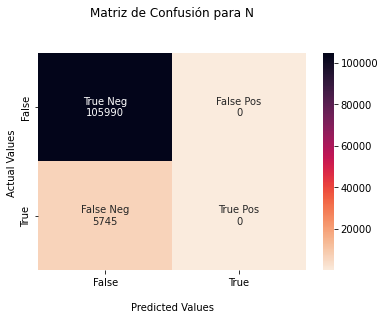

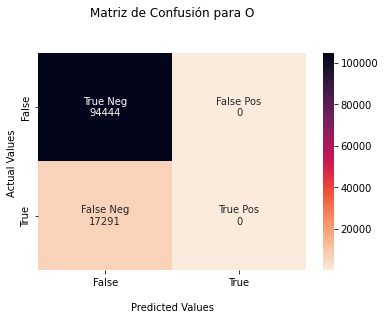

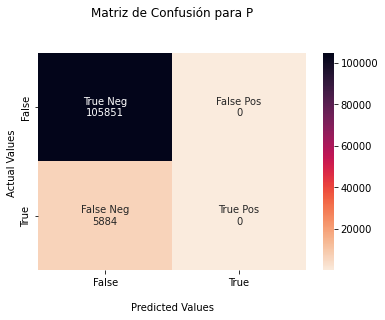

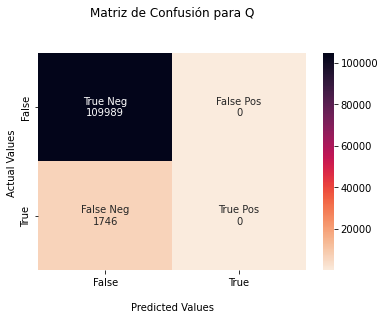

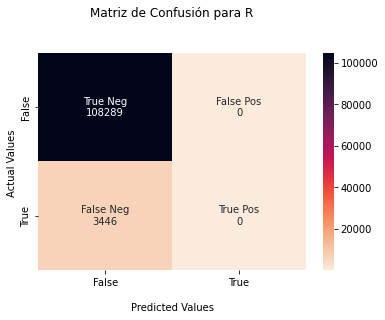

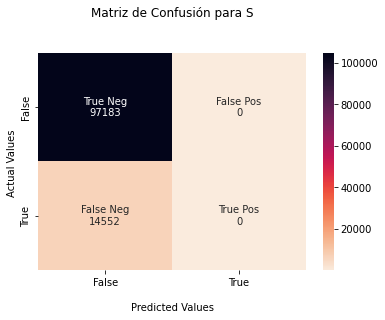

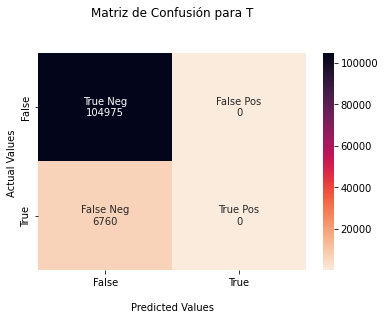

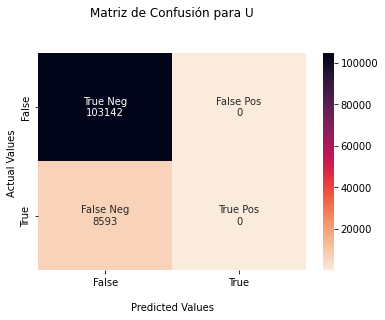

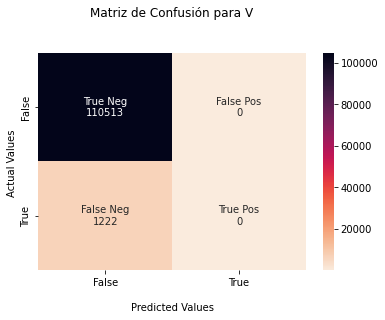

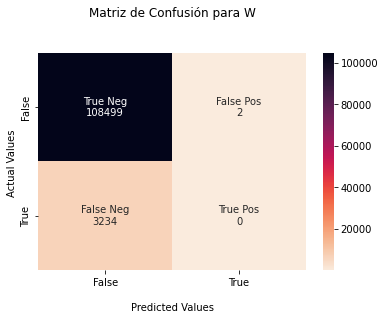

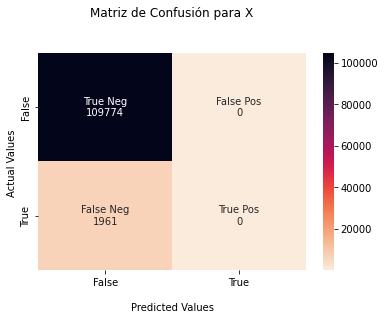

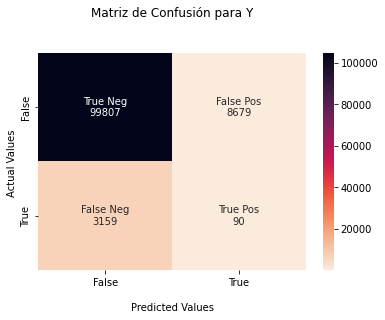

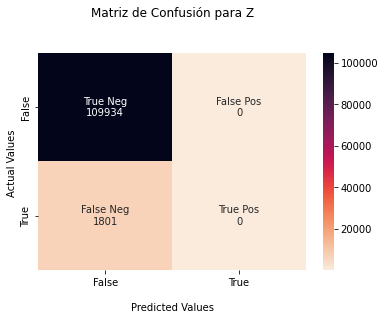

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z' ]

for i, matrix in enumerate(matriz_confusion):
  labels = [f'True Neg\n{matrix[0][0]}',f'False Pos\n{matrix[0][1]}',f'False Neg\n{matrix[1][0]}',f'True Pos\n{matrix[1][1]}']

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(matriz_confusion[2], annot=labels, fmt='', cmap='rocket_r')

  ax.set_title(f'Matriz de Confusión para {clases[i]}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()